<a href="https://colab.research.google.com/github/seoin-cho/SOLUX_summer_data/blob/master/3%2C4%EC%A3%BC%EC%B0%A8_%EC%BA%90%EA%B8%80/%EC%BA%90%EA%B8%80%EC%8B%A4%EC%8A%B5_3(8_10~8_13).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#노트북 안에서 그래프를 그리기 위해

%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings  #경고를 제어/ 경고 메세지 숨기기
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
question = pd.read_csv('/content/drive/My Drive/schema.csv')  #csv 파일 읽어오기
question.shape  #.shape 을 통해 총 몇 행, 몇 열 인지 알아보기

(290, 3)

In [ ]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [ ]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [ ]:
#판다스로 선다형 객관식 문제에 대한 응답을 가져옴
mcq = pd.read_csv('/content/drive/My Drive/multipleChoiceResponses.csv',
                  encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [ ]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [ ]:
mcq.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,Employed by a company that doesn't perform adv...,Jupyter notebooks,Bayesian Methods,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Kaggle,Non-Kaggle online communities,Online co...",NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,Somewhat useful,NaN,Somewhat useful,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,Less than 10% of projects,More internal than external,IT Department,NaN,NaN,"Key-value store (e.g. Redis/Riak),Row-oriented...","Email,Share Drive/SharePoint",NaN,Git,Rarely,NaN,IDR,I do not want to share information about my sa...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,Employed by professional services/consulting firm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

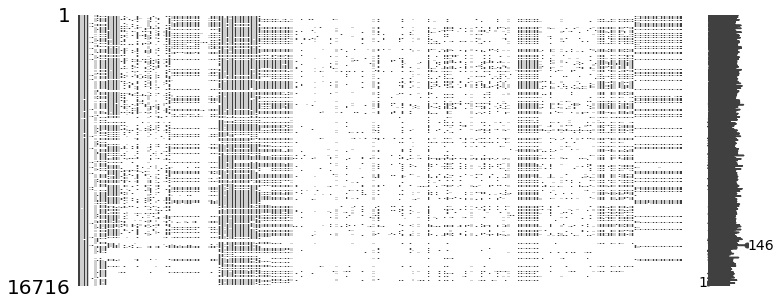

In [ ]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어렵다.
import missingno as msno

msno.matrix(mcq, figsize=(12,5))

In [ ]:
# 설문통계

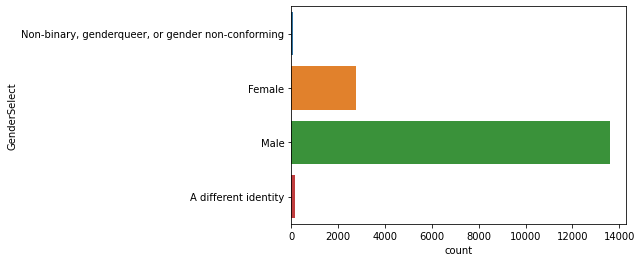

In [ ]:
# 성별
#sns.countplot()을 통해 각 응답별 응답 수를 그래프로 그릴 수 있다.
sns.countplot(y='GenderSelect', data=mcq)

In [ ]:
# 국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts())
# print(con_df)
# 'country' 컬럼을 인덱스로 지정해주고
con_df['국가'] = con_df.index
# 컬럼의 순서대로 응답 수, 국가로 컬럼명을 지정해 줌
con_df.columns = ['응답 수', '국가']
# index 컬럼을 삭제하고 순위를 알기 위해 reset_index()를 해 준다.
# 우리나라는 18위이고 전체 52개국에서 참여했지만 20위까지만 본다.
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)


,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [ ]:
# 연령에 대한 정보를 본다.
#.describe()를 통해 응답 수, 평균, 표준편차, 최솟값 등을 살펴본다.
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

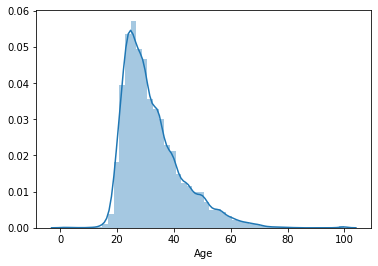

In [ ]:
sns.distplot(mcq[mcq['Age']>0]['Age'])  #나이가 0보다 큰 경우 만을 그래프로 그린다.

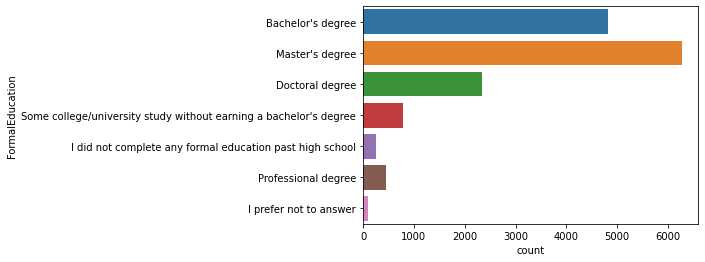

In [ ]:
# 학력
sns.countplot(y='FormalEducation', data=mcq)

In [ ]:
# 전공
# value_counts 를 사용하면 그룹화된 데이터의 카운트 값을 보여준다.
# normalize=True 옵션을 사용하면, 해당 데이터가 전체 데이터에서 차지하는 비율을 알 수 있다.
# .merge()를 이용해 두 데이터프레임을 합쳐준다.
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(
               mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


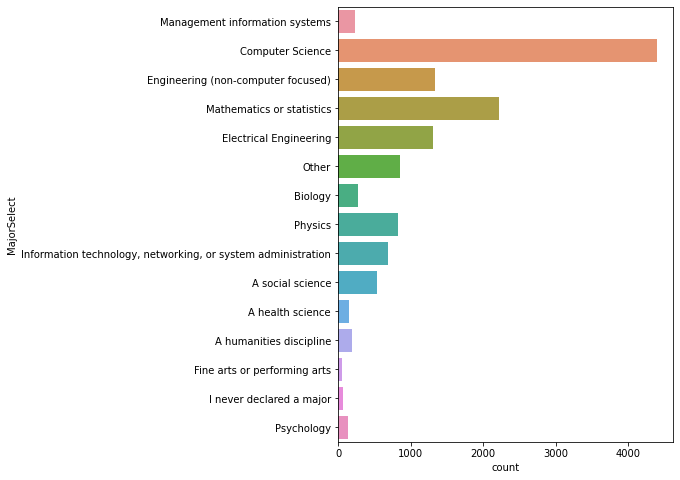

In [ ]:
# 재학 중인 사람들의 전공 현황
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

In [ ]:
# 취업여부
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())  #그룹 별 응답 수
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))  #그룹 별 비율
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index=True, right_index=True)  #두 데이터프레임 합치기
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


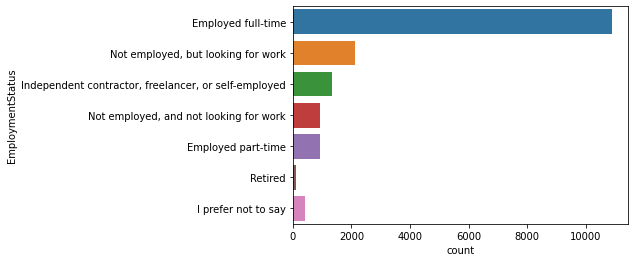

In [ ]:
sns.countplot(y='EmploymentStatus', data=mcq)

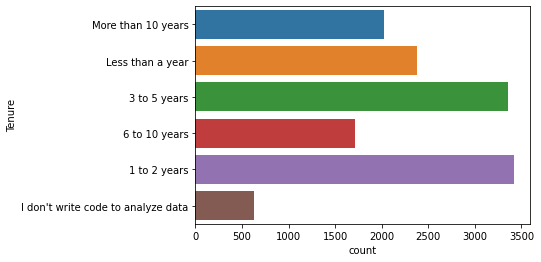

In [ ]:
# 프로그래밍 경험
sns.countplot(y='Tenure', data=mcq)

The number of interviewees in Korea:  194


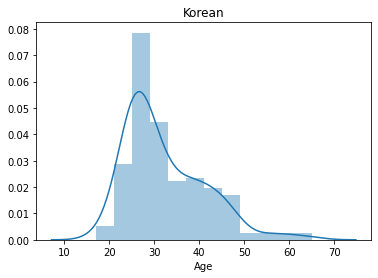

In [ ]:
#.loc()를 이용해 Country가 South Korea인 응답만 인덱싱
korea = mcq.loc[mcq['Country']=='South Korea']
print('The number of interviewees in Korea: ', str(korea.shape[0]))

#dropna 메소드를 통해 NaN값을 삭제
sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [ ]:
# 성별
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

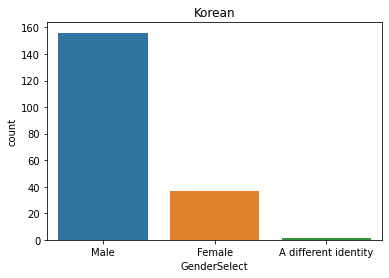

In [ ]:
# 한국인들의 성별 표
sns.countplot(x='GenderSelect', data= korea)
plt.title('Korean')

Text(0.5, 1.0, 'korean Male')

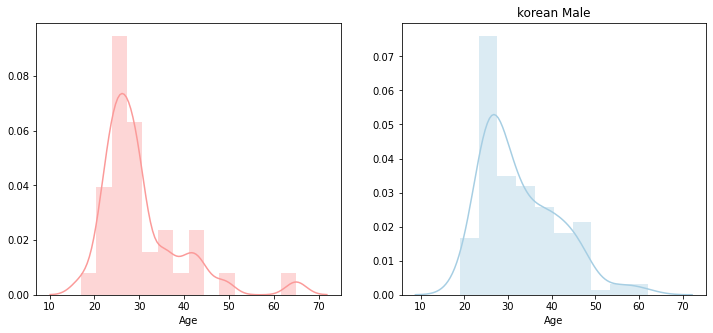

In [ ]:
#한국인 여자와 남자 각각의 성별 분포표
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(), norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(), norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')

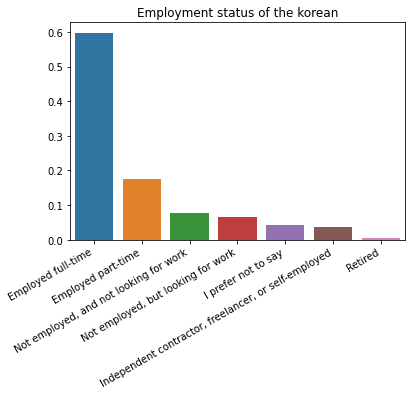

In [ ]:
#.unique()를 통해 유일한 값 찾기/ 중복 원소 간주x
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts(normalize=True))
plt.xticks(rotation=30, ha='right')  #글씨가 겹쳐서 30도씩 기울여서 보여줌
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

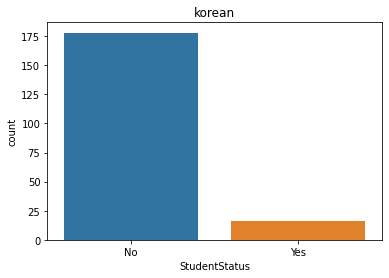

In [ ]:
#.fillna()를 통해 Nan 값을 특정 값으로 변경
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [ ]:
full_time = mcq.loc[mcq['EmploymentStatus']=='Employed full-time']
print(full_time.shape)
looking_for_job = mcq.loc[mcq['EmploymentStatus']=='Not employed, but looking for work']
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


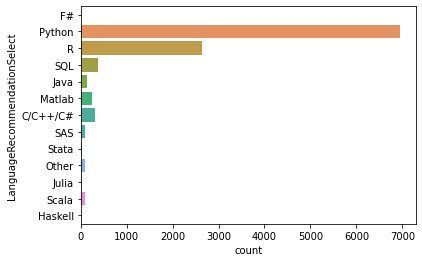

In [ ]:
# 자주 묻는 질문 FAQ
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

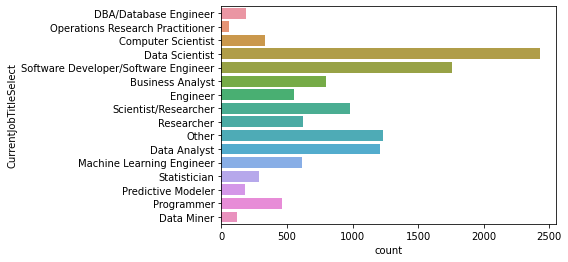

In [ ]:
# 현재 하고 있는 일
sns.countplot(y=mcq['CurrentJobTitleSelect'])  #countplot을 이용하는 조금 다른 방식

In [ ]:
# 현재 하고 있는 일에 대한 전체 응답 수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7158, 228)


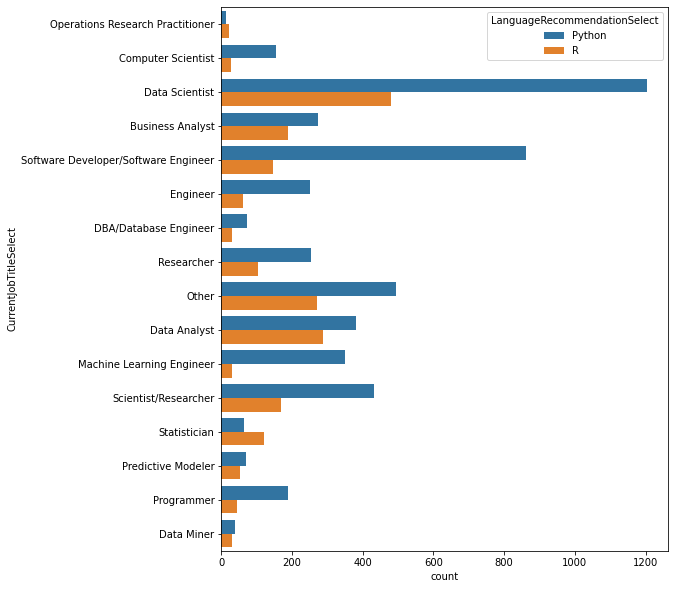

In [ ]:
# 현재 하고 있는 일에 대한 응답을 해준 사람 중 Python과 R을 사용하는 사람
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 볼 수 있다.
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & ((mcq['LanguageRecommendationSelect']=='Python') | (mcq['LanguageRecommendationSelect']=='R'))]
print(data.shape)
plt.figure(figsize=(8,10))
sns.countplot(y='CurrentJobTitleSelect', hue='LanguageRecommendationSelect', data=data)

In [ ]:
# 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까?
mcq_ml_tool_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True)) 
mcq_ml_tool_df = mcq_ml_tool_count.merge(mcq_ml_tool_percent, right_index=True, left_index=True).head(20)
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


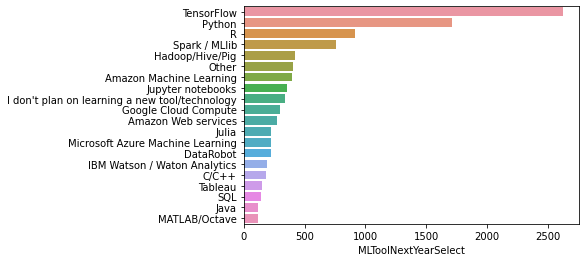

In [ ]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

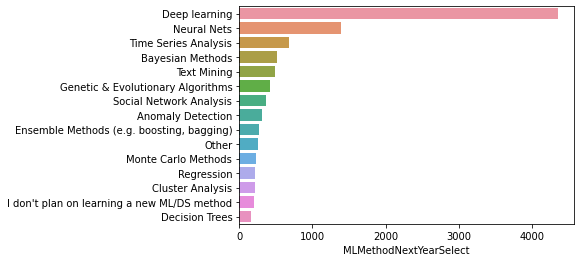

In [ ]:
# 데이터사이언스 방법
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [ ]:
# 데이터사이언스는 어디에서 배워야 할까?
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))  #.astype()을 이용해 문자열로 변환
s = mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']), axis=1).stack().reset_index(level=1, drop=True)
s.name='platform'

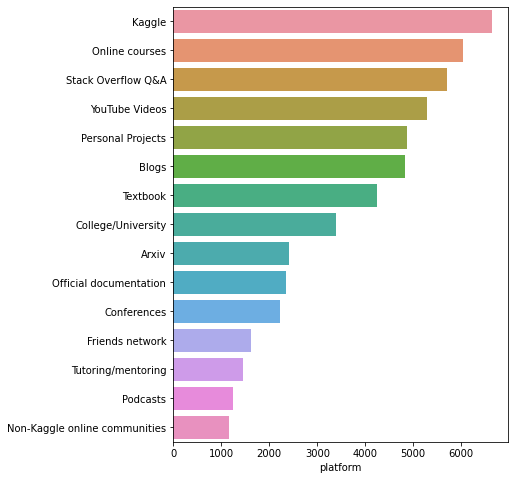

In [ ]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)  #NaN이 아닌 원소만 
sns.barplot(y=data.index, x=data)

In [ ]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question['Column'].str.contains('LearningCategory')]  #'LearningCategory'를 포함하고 있는 question 추출
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [ ]:
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') !=-1] 

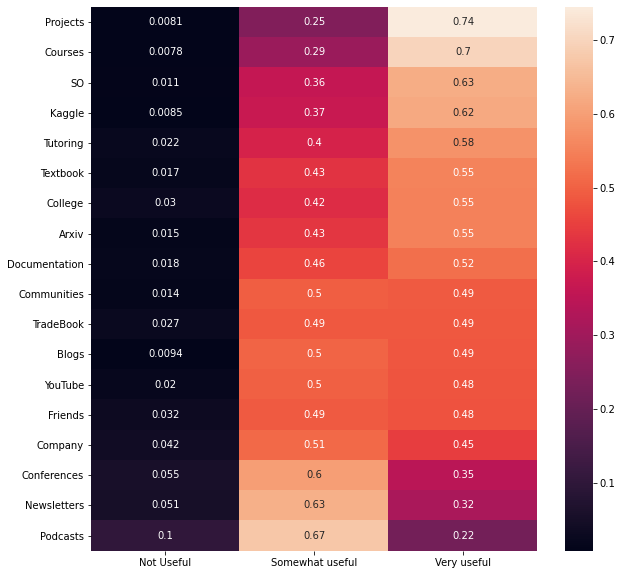

In [ ]:
# 학습플랫폼과 유용함에 대한 연관성을 살핀다.
fdf = {}
for feature in use_features:
  a = mcq[feature].value_counts()
  a = a/a.sum()
  fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending=False)

# 학습플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려본다.
plt.figure(figsize=(10,10))
sns.heatmap(fdf.sort_values("Very useful", ascending=False), annot=True)

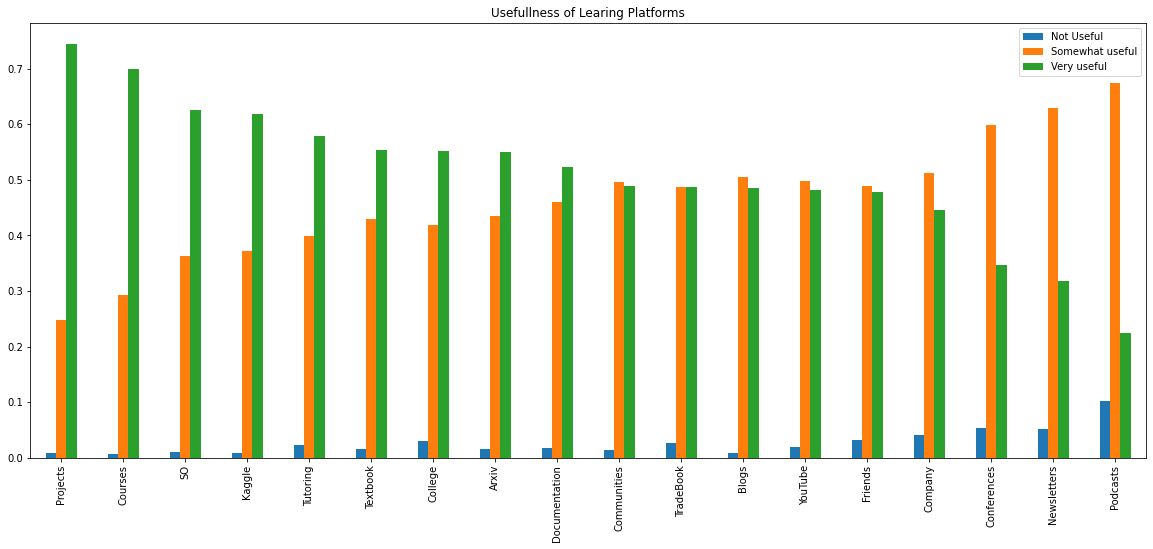

In [ ]:
# 유용함의 정도를 각 플랫폼별로 그룹화 해서 본다.
fdf.plot(kind='bar', figsize=(20,8), title='Usefullness of Learing Platforms')

In [ ]:
cat_features = [x for x in mcq.columns if x.find('LearningCategory') !=-1]  #'LearningCategory'를 포함하고 있는 것 추출
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [ ]:
cdf = {}
for feature in cat_features:
  cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

# 파이차트를 그리기 위해 평균 값을 구해와서 담아준다.
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

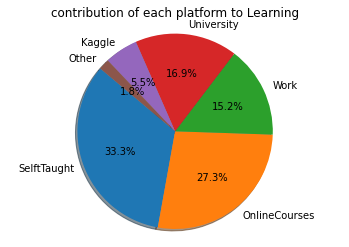

In [ ]:
# 학습 플랫폼 별 도움이 되는 정도를 그려본다.
plt.pie(cdf, labels=cdf.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("contribution of each platform to Learning")
plt.show()

In [ ]:
# 데이터과학을 위해 높은 사양의 컴퓨터가 필요한가요?
qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [ ]:
#총 응답자 수 확인
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(4206,)

In [ ]:
mcq['HardwarePersonalProjectsSelect'] = mcq['HardwarePersonalProjectsSelect'].astype(str).apply(lambda x: x.split(','))
s = mcq.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [ ]:
s = s[s != 'nan']

In [ ]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Azure,669
Laptop + Cloud service (AWS,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


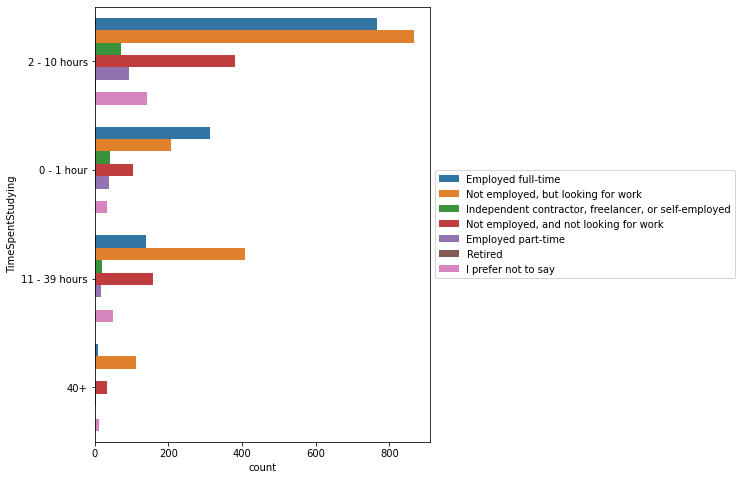

In [ ]:
# 데이터사이언스 공부에 얼마나 많은 시간을 사용하는지?
# 시간별 고용상태에 따른 비율
plt.figure(figsize=(6,8))
sns.countplot(y='TimeSpentStudying', data=mcq, hue='EmploymentStatus').legend(loc='center left', bbox_to_anchor=(1, 0.5))

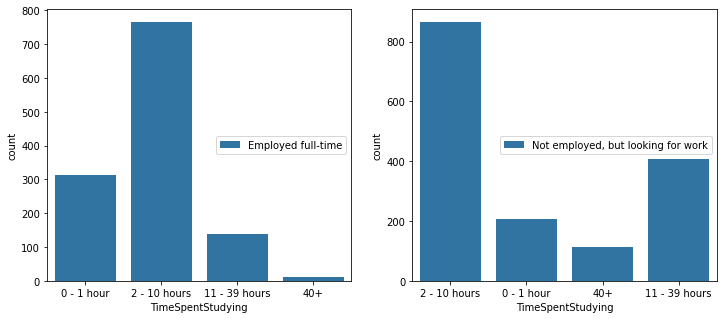

In [ ]:
#두 개의 그래프 그리는 법
figure , (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying', data=full_time, hue='EmploymentStatus', ax=ax1).legend(loc='center right', bbox_to_anchor=(1,0.5))
sns.countplot(x='TimeSpentStudying', data=looking_for_job, hue='EmploymentStatus', ax=ax2).legend(loc='center right', bbox_to_anchor=(1,0.5))

In [ ]:
# 블로그, 팟캐스트, 수업, 기타 등등 추천할 만한 것이 있는지?
mcq['BlogsPodcastsNewslettersSelect'] = mcq['BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [ ]:
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

In [ ]:
s = s[s != 'nan'].value_counts().head(20)

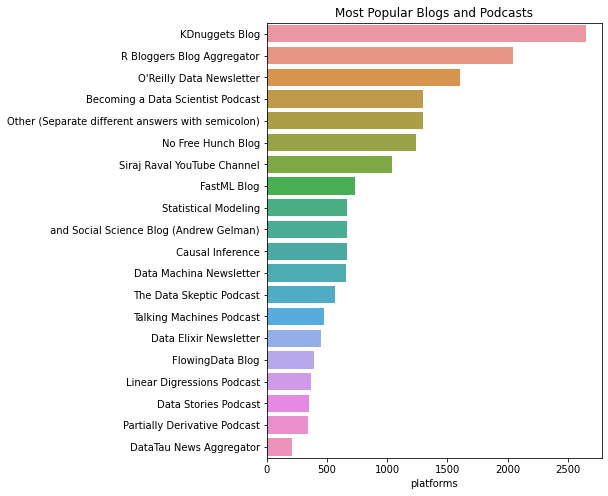

In [ ]:
#막대그래프 그리기
plt.figure(figsize=(6,8))
plt.title('Most Popular Blogs and Podcasts')
sns.barplot(y=s.index, x=s)

In [ ]:
#lambda 함수는 사용자 정의 함수를 간단하게 해결할 수 있는 함수이다.
#lambda 함수의 기본 구조 -> lambda <매개변수1>, <매개변수2>... : 매개변수를 이용한 식(if 문이 나올 수 있음)
#apply를 통해 함수를 적용
mcq['CoursePlatformSelect'] = mcq['CoursePlatformSelect'].astype('str').apply(lambda x: x.split(','))
mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [ ]:
t = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']), axis=1).stack().reset_index(level=1, drop=True)
t.head(20)

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
dtype: object

In [ ]:
t = t[t != 'nan'].value_counts()

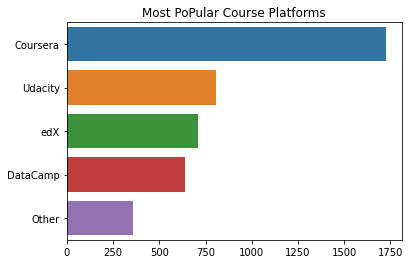

In [ ]:
plt.title('Most PoPular Course Platforms')
sns.barplot(y=t.index, x=t)

In [ ]:
# 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은?
job_features = [x for x in mcq.columns if x.find('JobSkillImportance') !=-1]  #'JobSkillImportance'가 포함된 것 추출
job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations',
 'JobSkillImportanceOtherSelect1',
 'JobSkillImportanceOtherSelect2',
 'JobSkillImportanceOtherSelect3']

In [ ]:
jdf = {}
for feature in job_features:
  a = mcq[feature].value_counts()
  a = a/a.sum()
  jdf[feature[len('JobSkillImportance'):]] = a
jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'KaggleRanking': Nice to have    0.677261
 Unnecessary     0.203876
 Necessary       0.118863
 Name: JobSkillImportanceKaggleRanking, dtype: float64,
 'MOOC': Nice to have    0.606994
 Unnecessary     0.285752
 Necessary       0.107255
 Name: JobSkillImportanceMOOC, dtype: float64,
 'OtherSelect1': Necessary       0.536313
 Nice to have    0.304469
 Unnecessary     0.159218
 Name: JobSkillImportanceOtherSelect1, dtype: float64,
 'OtherSelect2': Necessary       0.436047
 Nice to have    0.348837
 Unnecessary     0.215116
 Name: JobSkillImportanceOtherSelect2, dty

In [ ]:
#.transpose()를 통해 행렬을 전치
jdf = pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


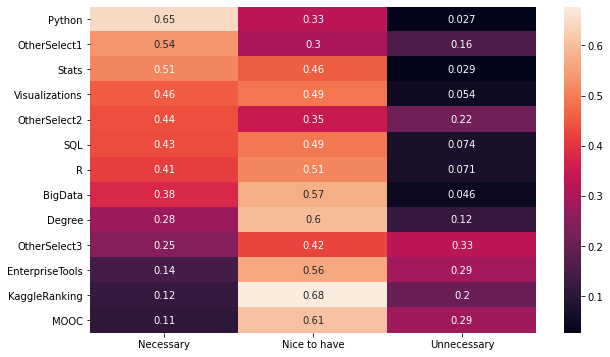

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values('Necessary', ascending=False), annot=True)

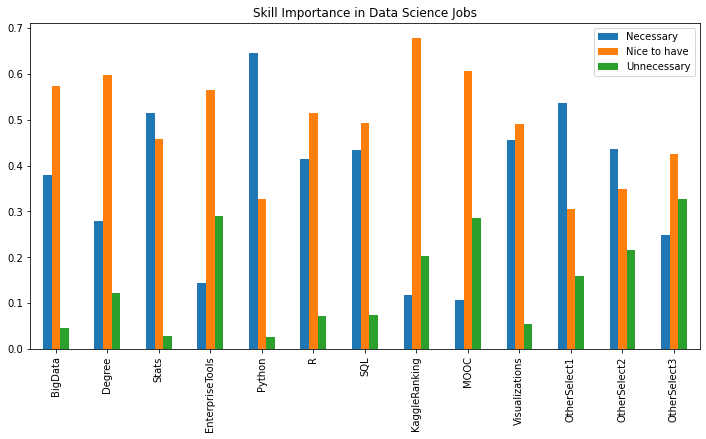

In [ ]:
jdf.plot(kind='bar', figsize=(12,6), title='Skill Importance in Data Science Jobs')

In [ ]:
# 데이터 과학자의 평균 급여는 얼마나 될까?
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [ ]:
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace(',', '')
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace('-', '')

# 환율 계산을 위한 정보 가져오기
rates = pd.read_csv('/content/drive/My Drive/conversionRates.csv')
rates.drop('Unnamed: 0', axis=1, inplace=True)

salary = mcq[['CompensationAmount', 'CompensationCurrency', 'GenderSelect', 'Country', 'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates, left_on='CompensationCurrency', right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(salary['CompensationAmount']) * salary['exchangeRate']
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [ ]:
print('Maximum Salary is USD $', salary['Salary'].dropna().astype(int).max())
print('Maximum Slary is USD $', salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $', salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 28297400000
Maximum Slary is USD $ 0
Median Salary is USD $ 53812.0


Text(0.5, 1.0, 'Salary Distribution')

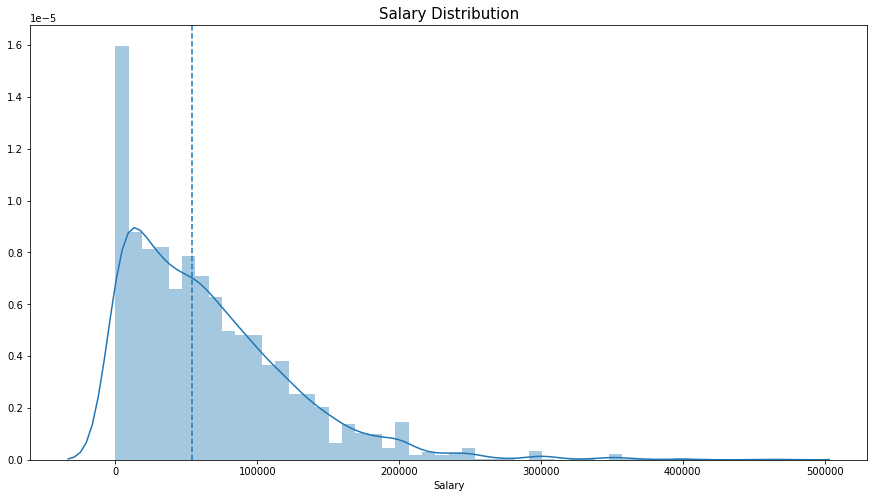

In [ ]:
plt.subplots(figsize=(15,8))
salary = salary[salary['Salary']<500000]  #50만불 미만의 급여 분포 살펴보기
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle='dashed')  #중앙값에 점선 표시
plt.title('Salary Distribution', size=15)

Text(0.5, 1.0, 'Highest Salary Paying Countries')

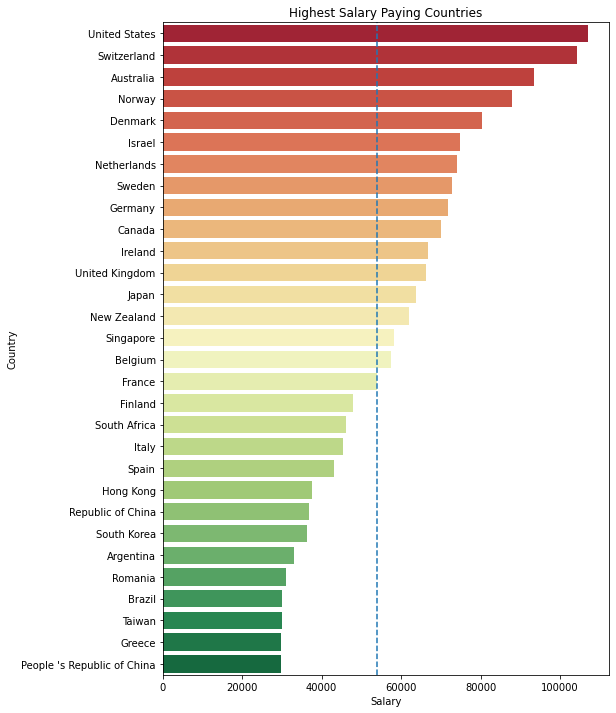

In [ ]:
plt.subplots(figsize=(8,12))

sal_coun = salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:30].to_frame()
sns.barplot('Salary', sal_coun.index, data=sal_coun, palette='RdYlGn')

plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Highest Salary Paying Countries')

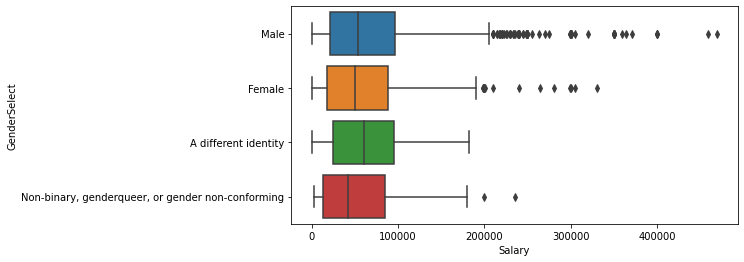

In [ ]:
#성별에 따른 급여 분포를 상자 그림으로 나타내기
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect', x='Salary', data=salary)

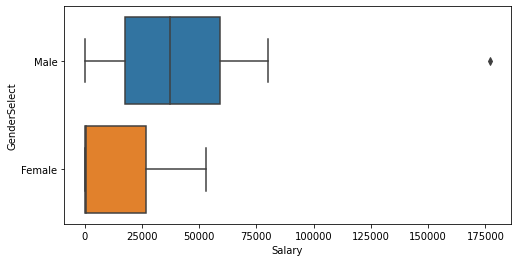

In [ ]:
#한국인의 성별에 따른 급여분포 알아보기
salary_korea = salary.loc[salary['Country']=='South Korea']
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect', x='Salary', data=salary_korea)

In [ ]:
salary_korea.shape

(26, 8)

In [ ]:
salary_korea[salary_korea['GenderSelect']=='Female']

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00


In [ ]:
salary_korea_male = salary_korea[salary_korea['GenderSelect']=='Male']
salary_korea_male['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

In [ ]:
salary_korea_male

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
85,40000000,KRW,Male,South Korea,Business Analyst,KRW,0.000886,35440.000
147,80000,USD,Male,South Korea,Researcher,USD,1.000000,80000.000
314,60000,USD,Male,South Korea,Business Analyst,USD,1.000000,60000.000
333,60000000,KRW,Male,South Korea,Researcher,KRW,0.000886,53160.000
562,50000000,KRW,Male,South Korea,Researcher,KRW,0.000886,44300.000
769,42000000,KRW,Male,South Korea,Software Developer/Software Engineer,KRW,0.000886,37212.000
799,1000,KRW,Male,South Korea,Machine Learning Engineer,KRW,0.000886,0.886
1060,75000000,KRW,Male,South Korea,Scientist/Researcher,KRW,0.000886,66450.000
1360,30000000,KRW,Male,South Korea,Statistician,KRW,0.000886,26580.000
1568,90000,SGD,Male,South Korea,Computer Scientist,SGD,0.742589,66833.010


In [ ]:
# 개인 프로젝트나 학습용 데이터를 어디에서 얻나요?
mcq['PublicDatasetsSelect'] = mcq['PublicDatasetsSelect'].astype('str').apply(lambda x: x.split(','))

In [ ]:
q = mcq.apply(lambda x: pd.Series(x['PublicDatasetsSelect']), axis=1).stack().reset_index(level=1, drop=True)
q.name = 'courses'
q = q[q != 'nan'].value_counts()
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


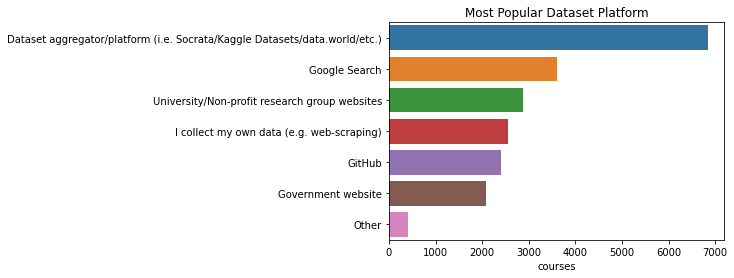

In [ ]:
plt.title('Most Popular Dataset Platform')
sns.barplot(y=q.index, x=q)

In [ ]:
# 주관식 응답을 읽어온다.
ff = pd.read_csv('/content/drive/My Drive/freeformResponses.csv', encoding="ISO-8859-1", low_memory=False)
ff.shape

(16716, 62)

In [ ]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question['Column'].str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
qc.Question.values[0]

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

In [ ]:
ppcff = ff['PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name='응답 수'
pd.DataFrame(ppcff)

,응답 수
None,23
Cleaning the data,20
Cleaning,20
Dirty data,16
Data Cleaning,14
none,13
dirty data,10
Data cleaning,10
Size,9
-,9


In [ ]:
# 데이터 사이언스 업무에서 가장  많은 시간을 필요로 하는 일은?
time_features = [x for x in mcq.columns if x.find('Time') !=-1][4:10]

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64



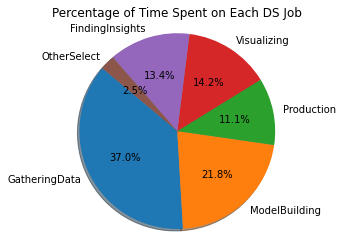

In [ ]:
tdf = {}
for feature in time_features:
  tdf[feature[len('Time'):]] = mcq[feature].mean()

tdf = pd.Series(tdf)
print(tdf)
print()

plt.pie(tdf, labels=tdf.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of Time Spent on Each DS Job')
plt.show()

In [ ]:
# 데이터사이언스 직업을 찾는데 가장 고려해야 할 요소는 무엇일까?
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question['Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [ ]:
job_factors = [x for x in mcq.columns if x.find('JobFactor') !=-1]

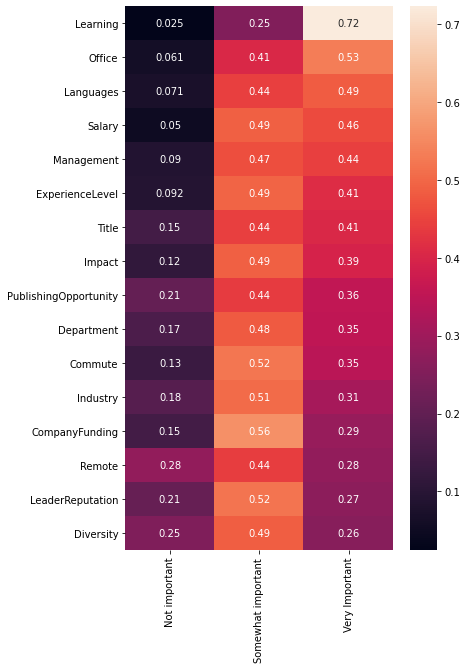

In [ ]:
#heatmap으로 각 요소의 중요도 알아보기.
jfdf = {}
for feature in job_factors:
  a = mcq[feature].value_counts()
  a = a/a.sum()
  jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(6,10))
sns.heatmap(jfdf.sort_values('Very Important', ascending=False), annot=True)

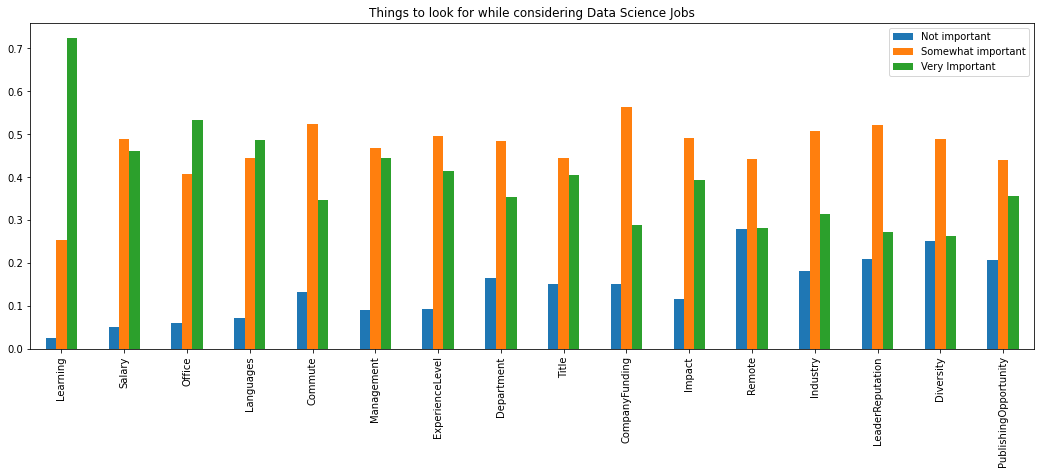

In [ ]:
jfdf.plot(kind='bar', figsize=(18,6), title="Things to look for while considering Data Science Jobs")
plt.show()

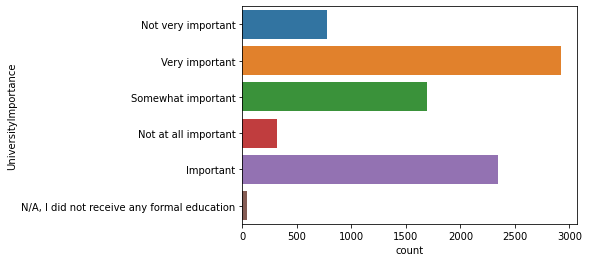

In [ ]:
# 데이터 사이언티스트가 되기 위해 학위가 중요할까?
sns.countplot(y='UniversityImportance', data=mcq)

In [ ]:
#연령에 따른 학위의 중요성
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact

import plotly.io as pio
pio.renderers.default = 'colab'

top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
  top_uni_dist.append(mcq[(mcq['Age'].notnull()) & (mcq['UniversityImportance'] == uni)]['Age'])

group_labels = top_uni.index

fig = fig_fact.create_distplot(top_uni_dist, group_labels, show_hist=False)
py.iplot(fig, filename='University Importance by Age')

In [ ]:
# 어디에서부터 데이터사이언스를 시작해야할까?
mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

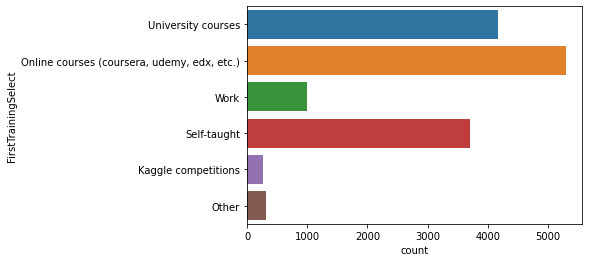

In [ ]:
sns.countplot(y='FirstTrainingSelect', data=mcq)

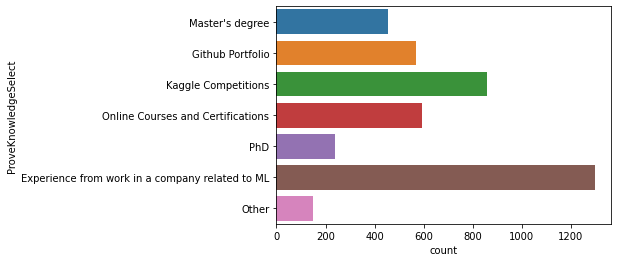

In [ ]:
# 데이터 사이언티스트 이력서에서 가장 중요한 것은 무엇일까?
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

In [ ]:
# 머신러닝 알고리즘을 사용하기 위해 수학이 필요할까요?
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question['Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [ ]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

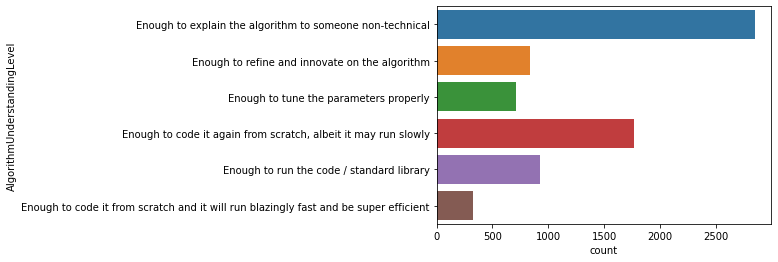

In [ ]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

In [ ]:
# 어디에서 일을 찾아야 할까요?
# 설문내용과 누구에게 물어봤는지를 찾아봄
question.loc[question['Column'].str.contains('JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


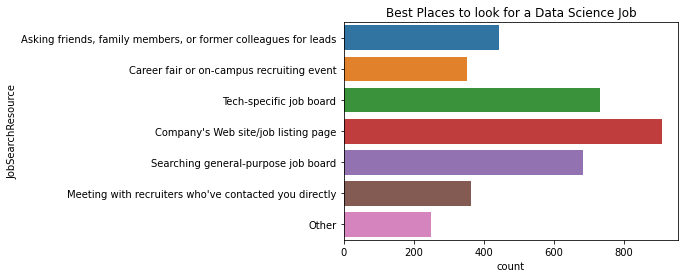

In [ ]:
plt.title('Best Places to look for a Data Science Job')
sns.countplot(y='JobSearchResource', data=mcq)

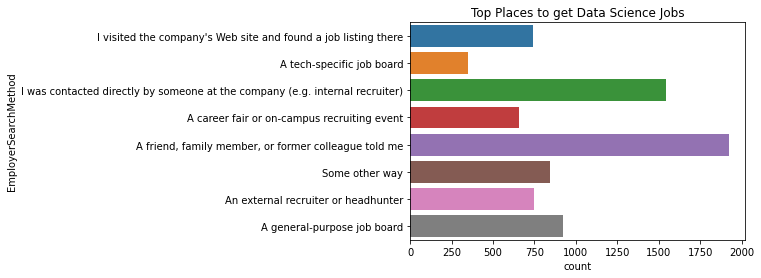

In [ ]:
plt.title('Top Places to get Data Science Jobs')
sns.countplot(y='EmployerSearchMethod', data=mcq)

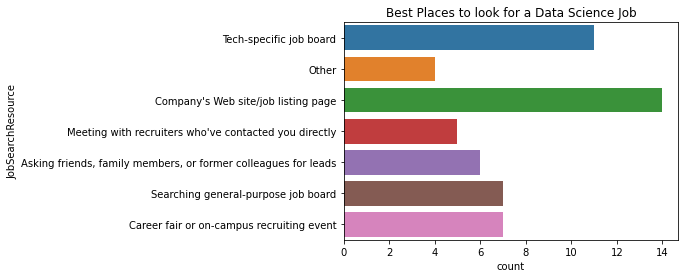

In [ ]:
# 그럼 한국사람들은 어떨까?
plt.title('Best Places to look for a Data Science Job')
sns.countplot(y='JobSearchResource', data=korea)

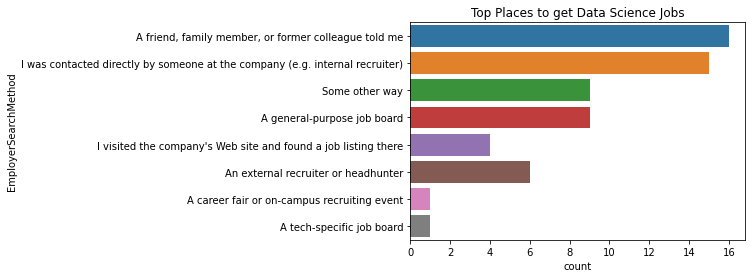

In [ ]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=korea)